In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
import os
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two partsd

In [3]:
os.getcwd()

'C:\\Users\\dingxin ji'

In [3]:
card = pd.read_csv('UCI_Credit_Card.csv')
card.shape
card.head(5)

(30000, 25)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
card.rename(columns={'PAY_0':'RepayStatus_Sep', 'PAY_2':'RepayStatus_Aug', 'PAY_3':'RepayStatus_Jul', 'PAY_4':'RepayStatus_Jun', 'PAY_5':'RepayStatus_May','PAY_6':'RepayStatus_Apr','BILL_AMT1':'Bill_Sep','BILL_AMT2':'Bill_Aug','BILL_AMT3':'Bill_Jul','BILL_AMT4':'Bill_Jun','BILL_AMT5':'Bill_May','BILL_AMT6':'Bill_Apr','PAY_AMT1':'Pay_Sep','PAY_AMT2':'Pay_Aug','PAY_AMT3':'Pay_Jul','PAY_AMT4':'Pay_Jun','PAY_AMT5':'Pay_May','PAY_AMT6':'Pay_Apr','default.payment.next.month':'Def_pay'},inplace = True)
card.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sep,RepayStatus_Aug,RepayStatus_Jul,RepayStatus_Jun,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
card.columns
card.describe()
card.isnull().sum()


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'RepayStatus_Sep', 'RepayStatus_Aug', 'RepayStatus_Jul',
       'RepayStatus_Jun', 'RepayStatus_May', 'RepayStatus_Apr', 'Bill_Sep',
       'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'Pay_Sep',
       'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Def_pay'],
      dtype='object')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sep,RepayStatus_Aug,RepayStatus_Jul,RepayStatus_Jun,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
RepayStatus_Sep    0
RepayStatus_Aug    0
RepayStatus_Jul    0
RepayStatus_Jun    0
RepayStatus_May    0
RepayStatus_Apr    0
Bill_Sep           0
Bill_Aug           0
Bill_Jul           0
Bill_Jun           0
Bill_May           0
Bill_Apr           0
Pay_Sep            0
Pay_Aug            0
Pay_Jul            0
Pay_Jun            0
Pay_May            0
Pay_Apr            0
Def_pay            0
dtype: int64

In [6]:
card.info()
card.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
RepayStatus_Sep    30000 non-null int64
RepayStatus_Aug    30000 non-null int64
RepayStatus_Jul    30000 non-null int64
RepayStatus_Jun    30000 non-null int64
RepayStatus_May    30000 non-null int64
RepayStatus_Apr    30000 non-null int64
Bill_Sep           30000 non-null float64
Bill_Aug           30000 non-null float64
Bill_Jul           30000 non-null float64
Bill_Jun           30000 non-null float64
Bill_May           30000 non-null float64
Bill_Apr           30000 non-null float64
Pay_Sep            30000 non-null float64
Pay_Aug            30000 non-null float64
Pay_Jul            30000 non-null float64
Pay_Jun            30000 non-nu

ID                   int64
LIMIT_BAL          float64
SEX                  int64
EDUCATION            int64
MARRIAGE             int64
AGE                  int64
RepayStatus_Sep      int64
RepayStatus_Aug      int64
RepayStatus_Jul      int64
RepayStatus_Jun      int64
RepayStatus_May      int64
RepayStatus_Apr      int64
Bill_Sep           float64
Bill_Aug           float64
Bill_Jul           float64
Bill_Jun           float64
Bill_May           float64
Bill_Apr           float64
Pay_Sep            float64
Pay_Aug            float64
Pay_Jul            float64
Pay_Jun            float64
Pay_May            float64
Pay_Apr            float64
Def_pay              int64
dtype: object

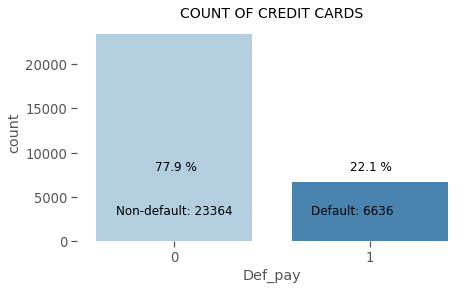

In [7]:
# The frequency of defaults
yes = card.Def_pay.sum()
no = len(card)-yes

# Percentage
yes_perc = round(yes/len(card)*100, 1)
no_perc = round(no/len(card)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Def_pay',data=card, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

In [8]:
card = card.drop('ID', axis=1)
print("Explanatory variables:  {}".format(len(card.columns)-1))
print("Number of Observations: {}".format(card.shape[0]))

card['Def_pay'] = card['Def_pay'].astype('category')

# create a 'target' column for our own convenience
print("Target variable:       '{}' -> '{}'".format('default payment next month', 'Def_pay'))

Explanatory variables:  23
Number of Observations: 30000
Target variable:       'default payment next month' -> 'Def_pay'


In [9]:
card['SEX'] = card['SEX'].astype('category').cat.rename_categories(['M', 'F'])
card['EDUCATION']=np.where(card['EDUCATION'] == 5, 4, card['EDUCATION'])
card['EDUCATION']=np.where(card['EDUCATION'] == 6, 4, card['EDUCATION'])
card['EDUCATION']=np.where(card['EDUCATION'] == 0, 4, card['EDUCATION'])
card['EDUCATION'] = card['EDUCATION'].astype('category').cat.rename_categories(['graduate school','university','high school','other'])
card['Def_pay'] = card['Def_pay'].astype('category').cat.rename_categories(['no','yes'])
card['MARRIAGE']=np.where(card['MARRIAGE'] == 0, 3, card['MARRIAGE'])
card['MARRIAGE'] = card['MARRIAGE'].astype('category').cat.rename_categories(['married', 'single', 'other'])

In [10]:
card.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sep,RepayStatus_Aug,RepayStatus_Jul,RepayStatus_Jun,RepayStatus_May,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Def_pay
0,20000.0,F,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,F,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,F,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,F,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,M,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
5,50000.0,M,graduate school,single,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,no
6,500000.0,M,graduate school,single,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,no
7,100000.0,F,university,single,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,no
8,140000.0,F,high school,married,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,no
9,20000.0,M,high school,single,35,-2,-2,-2,-2,-1,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,no


In [11]:
fil = (card.RepayStatus_Sep == -2) | (card.RepayStatus_Sep == -1) | (card.RepayStatus_Sep  == 0)
card.loc[fil, 'RepayStatus_Sep'] = 0
fil = (card.RepayStatus_Aug == -2) | (card.RepayStatus_Aug == -1) | (card.RepayStatus_Aug == 0)
card.loc[fil, 'RepayStatus_Aug'] = 0
fil = (card.RepayStatus_Jul == -2) | (card.RepayStatus_Jul == -1) | (card.RepayStatus_Jul == 0)
card.loc[fil, 'RepayStatus_Jul'] = 0
fil = (card.RepayStatus_Jun == -2) | (card.RepayStatus_Jun == -1) | (card.RepayStatus_Jun == 0)
card.loc[fil, 'RepayStatus_Jun'] = 0
fil = (card.RepayStatus_May == -2) | (card.RepayStatus_May == -1) | (card.RepayStatus_May == 0)
card.loc[fil, 'RepayStatus_May'] = 0
fil = (card.RepayStatus_Apr == -2) | (card.RepayStatus_Apr == -1) | (card.RepayStatus_Apr == 0)
card.loc[fil, 'RepayStatus_Apr'] = 0
late = card[['RepayStatus_Sep','RepayStatus_Aug', 'RepayStatus_Jul', 'RepayStatus_Jun', 'RepayStatus_May', 'RepayStatus_Apr']]

In [12]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null category
EDUCATION          30000 non-null category
MARRIAGE           30000 non-null category
AGE                30000 non-null int64
RepayStatus_Sep    30000 non-null int64
RepayStatus_Aug    30000 non-null int64
RepayStatus_Jul    30000 non-null int64
RepayStatus_Jun    30000 non-null int64
RepayStatus_May    30000 non-null int64
RepayStatus_Apr    30000 non-null int64
Bill_Sep           30000 non-null float64
Bill_Aug           30000 non-null float64
Bill_Jul           30000 non-null float64
Bill_Jun           30000 non-null float64
Bill_May           30000 non-null float64
Bill_Apr           30000 non-null float64
Pay_Sep            30000 non-null float64
Pay_Aug            30000 non-null float64
Pay_Jul            30000 non-null float64
Pay_Jun            30000 non-null float64
Pay_May            3

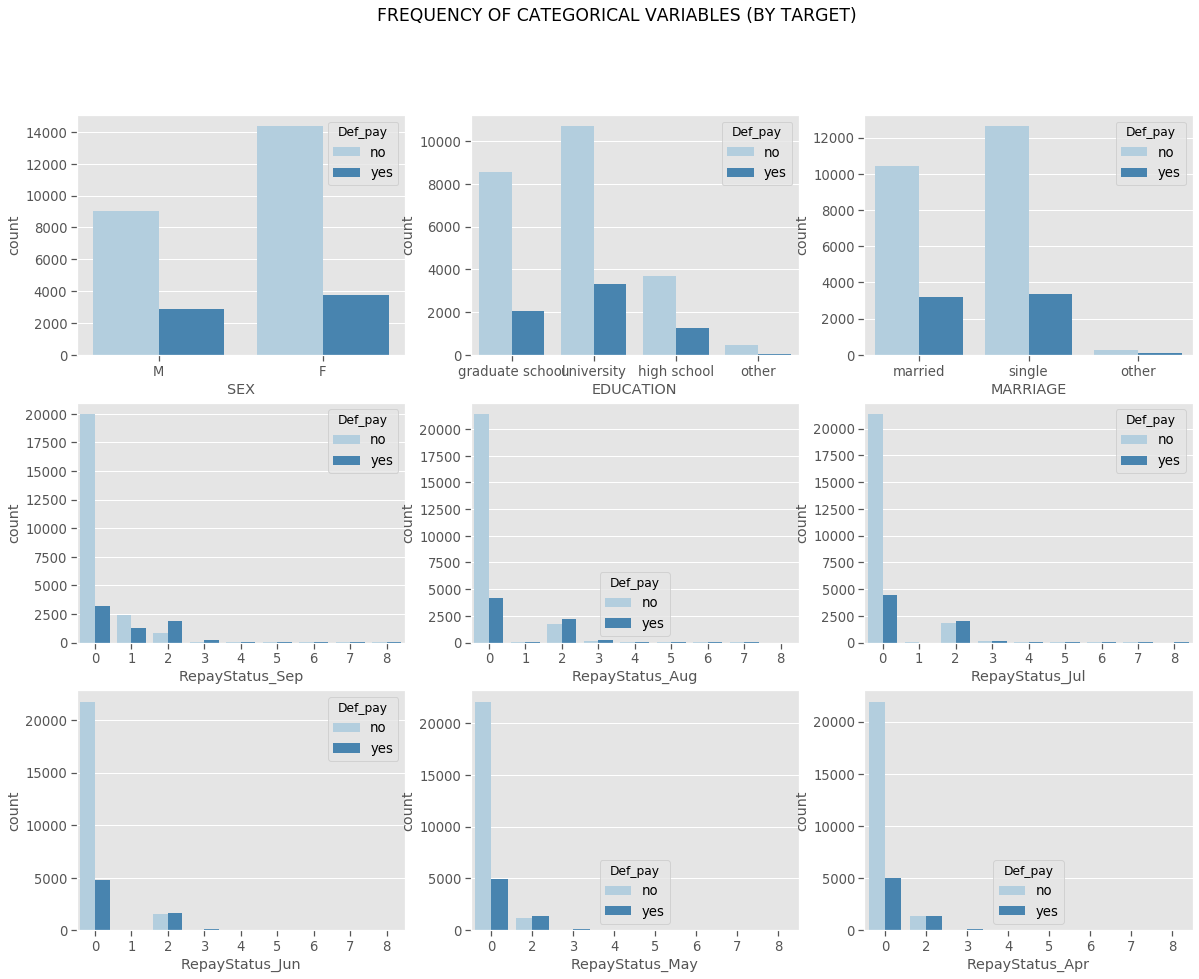

In [12]:
## Creating a new dataframe with categorical variables


subset = card[['SEX', 'EDUCATION', 'MARRIAGE', 'RepayStatus_Sep', 'RepayStatus_Aug', 'RepayStatus_Jul', 'RepayStatus_Jun', 
               'RepayStatus_May', 'RepayStatus_Apr', 'Def_pay']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Def_pay", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Def_pay", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Def_pay", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="RepayStatus_Sep", hue="Def_pay", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="RepayStatus_Aug", hue="Def_pay", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="RepayStatus_Jul", hue="Def_pay", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="RepayStatus_Jun", hue="Def_pay", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="RepayStatus_May", hue="Def_pay", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="RepayStatus_Apr", hue="Def_pay", data=subset, palette="Blues", ax=axes[2,2]);

C:\Users\dingxin ji\Downloads\python\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


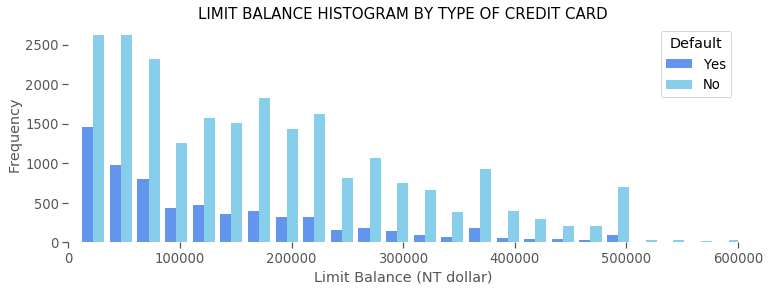

In [13]:
import sys
x1 = list(card[card['Def_pay'] == 'yes']['LIMIT_BAL'])
x2 = list(card[card['Def_pay'] == 'no']['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['cornflowerblue','skyblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

Text(0.5, 1.0, 'AGE')

Text(0.5, 0, 'Age (years old )')

Text(0, 0.5, 'Density ')

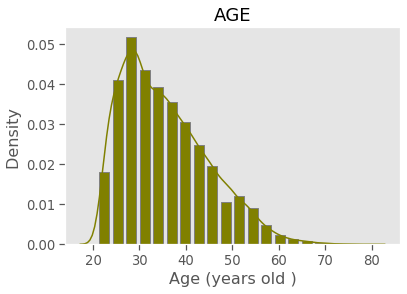

In [14]:
sns.distplot(card['AGE'], kde=True,color='olive',bins =20,hist_kws={"rwidth":0.75,'edgecolor':'gray', 'alpha':1.0})
plt.title('AGE', fontsize=18)
plt.xlabel('Age (years old )', fontsize=16)
plt.ylabel('Density ', fontsize=16)
plt.grid(False)


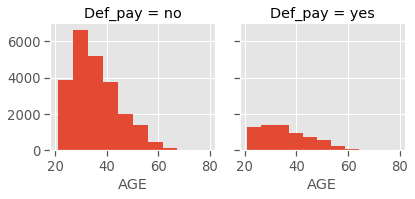

In [15]:
g = sns.FacetGrid(card, col = 'Def_pay')
g.map(plt.hist, 'AGE')


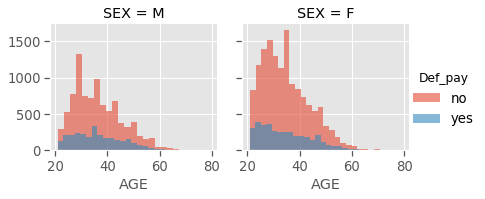

In [16]:
g = sns.FacetGrid(card, col='SEX', hue='Def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

In [17]:
import pandas as pd 
import statsmodels.api as sm 
import numpy as np 
card=pd.read_csv('UCI_Credit_Card.csv')
card['EDUCATION']=np.where(card['EDUCATION'] == 5, 4, card['EDUCATION'])
card['EDUCATION']=np.where(card['EDUCATION'] == 6, 4, card['EDUCATION'])
card['EDUCATION']=np.where(card['EDUCATION'] == 0, 4, card['EDUCATION'])
card.rename(columns={'PAY_0':'RepayStatus_Sep', 'PAY_2':'RepayStatus_Aug', 'PAY_3':'RepayStatus_Jul', 'PAY_4':'RepayStatus_Jun', 'PAY_5':'RepayStatus_May','PAY_6':'RepayStatus_Apr','BILL_AMT1':'Bill_Sep','BILL_AMT2':'Bill_Aug','BILL_AMT3':'Bill_Jul','BILL_AMT4':'Bill_Jun','BILL_AMT5':'Bill_May','BILL_AMT6':'Bill_Apr','PAY_AMT1':'Pay_Sep','PAY_AMT2':'Pay_Aug','PAY_AMT3':'Pay_Jul','PAY_AMT4':'Pay_Jun','PAY_AMT5':'Pay_May','PAY_AMT6':'Pay_Apr','default.payment.next.month':'Def_pay'},inplace = True)
fil = (card.RepayStatus_Sep == -2) | (card.RepayStatus_Sep == -1) | (card.RepayStatus_Sep  == 0)
card.loc[fil, 'RepayStatus_Sep'] = 0
fil = (card.RepayStatus_Aug == -2) | (card.RepayStatus_Aug == -1) | (card.RepayStatus_Aug == 0)
card.loc[fil, 'RepayStatus_Aug'] = 0
fil = (card.RepayStatus_Jul == -2) | (card.RepayStatus_Jul == -1) | (card.RepayStatus_Jul == 0)
card.loc[fil, 'RepayStatus_Jul'] = 0
fil = (card.RepayStatus_Jun == -2) | (card.RepayStatus_Jun == -1) | (card.RepayStatus_Jun == 0)
card.loc[fil, 'RepayStatus_Jun'] = 0
fil = (card.RepayStatus_May == -2) | (card.RepayStatus_May == -1) | (card.RepayStatus_May == 0)
card.loc[fil, 'RepayStatus_May'] = 0
fil = (card.RepayStatus_Apr == -2) | (card.RepayStatus_Apr == -1) | (card.RepayStatus_Apr == 0)
card.loc[fil, 'RepayStatus_Apr'] = 0
card = card.drop('ID', axis=1)
card.head(5)

 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStatus_Sep,RepayStatus_Aug,RepayStatus_Jul,RepayStatus_Jun,RepayStatus_May,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Def_pay
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
for i in list(card.columns) :     
    k = sum(pd.isnull(card[i]))
    print(i, k)

LIMIT_BAL 0
SEX 0
EDUCATION 0
MARRIAGE 0
AGE 0
RepayStatus_Sep 0
RepayStatus_Aug 0
RepayStatus_Jul 0
RepayStatus_Jun 0
RepayStatus_May 0
RepayStatus_Apr 0
Bill_Sep 0
Bill_Aug 0
Bill_Jul 0
Bill_Jun 0
Bill_May 0
Bill_Apr 0
Pay_Sep 0
Pay_Aug 0
Pay_Jul 0
Pay_Jun 0
Pay_May 0
Pay_Apr 0
Def_pay 0


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import sklearn
!pip install mglearn
import warnings
warnings.filterwarnings('ignore')



X = card.drop('Def_pay', axis=1)  
y = card['Def_pay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

print("lr.intercept_:", logreg.intercept_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print()
print()
print("lr.coef_:", logreg.coef_)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.78
lr.intercept_: [-0.00096705]
Training set score: 0.778
Test set score: 0.781


lr.coef_: [[-3.22954734e-06 -1.95937391e-03 -1.89440085e-03 -2.19634497e-03
  -1.64432444e-02  4.97089545e-03  3.99980883e-03  3.34025369e-03
   3.08038770e-03  2.76850134e-03  2.53098394e-03 -7.93384964e-06
   5.00563637e-06  2.09358798e-06  1.04696426e-07  3.10450218e-06
   1.89547062e-06 -2.39198367e-05 -2.03529999e-05 -7.05903280e-06
  -7.76443410e-06 -3.57762125e-06 -2.98396842e-06]]


In [18]:
logit = sm.Logit(y, X) 
result = logit.fit() 
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.446667
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.155     
Dependent Variable: Def_pay          AIC:              26846.0245
Date:               2019-11-21 17:39 BIC:              27037.1304
No. Observations:   30000            Log-Likelihood:   -13400.   
Df Model:           22               LL-Null:          -15853.   
Df Residuals:       29977            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
LIMIT_BAL        -0.0000   0.0000 -11.6326 0.0000 -0.0000 -0.0000
SEX              -0.2688   0.0275  -9.7800 0.0000 -0.3226 -0.2149


[[4687    0]
 [1313    0]]




Text(26.499999999999993, 0.5, 'True label')

Text(0.5, 8.5, 'Predicted label')

Text(0.5, 1, 'Confusion Matrix - Logistic Regression')

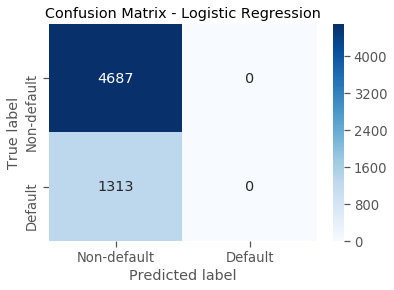

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print()
print()
sns.heatmap(confusion_matrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")


<Figure size 1440x720 with 0 Axes>

(-3, 3)

Text(0.5, 1.0, 'STANDARDIZED FEATURES - VIOLIN PLOT')

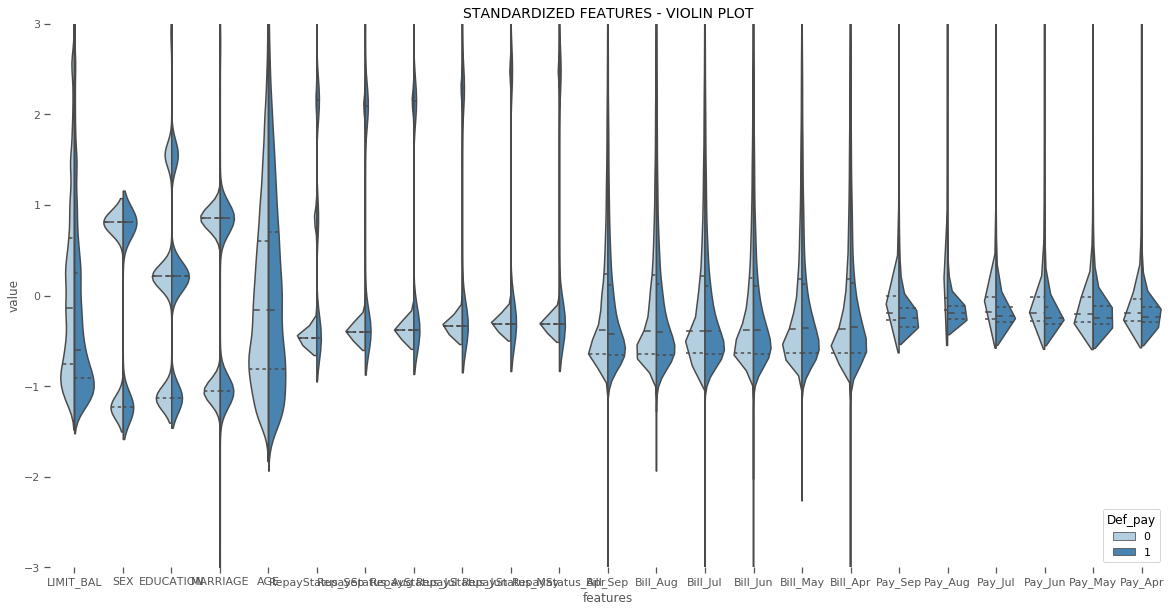

In [25]:
#The normal logistic regression model can not predict "Defaul", so let's try use logistic regression with standardized feature

features = card.drop('Def_pay', axis=1)  
y = card['Def_pay']
stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Def_pay",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="Def_pay", data=data_st,split=True, inner="quart", palette='Blues')
plt.legend(loc=4, title= 'Def_pay', facecolor='white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

In [38]:
#use RFE to select important features/variables

from sklearn.feature_selection import RFE
NUM_FEATURES = 3
model = LogisticRegression()
rfe_stand = RFE(model, NUM_FEATURES)
fit_stand = rfe_stand.fit(stdX, y)
#print("St Model Num Features:", fit_stand.n_features_)
#print("St Model Selected Features:", fit_stand.support_)
print("Std Model Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(stdX,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))
feature_names = np.array(features.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Std Model Feature Ranking: [ 5 11 14 10 15  1 18  6 12  8  4  1  1  7 21  9 20  2  3 19 17 16 13]
Standardized Model Score with selected features is: 0.819600 (0.000000)
Most important features (RFE): ['RepayStatus_Sep' 'Bill_Sep' 'Bill_Aug']


In [39]:
#build logistic regression model using important features and standardized feature
Ximp = stdX[['RepayStatus_Sep', 'Bill_Sep', 'Bill_Aug']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp,y, test_size=0.2, stratify=y, random_state=42)

Accuracy: 0.8191666666666667

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.69      0.33      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8195 , Standard deviation: 0.0093


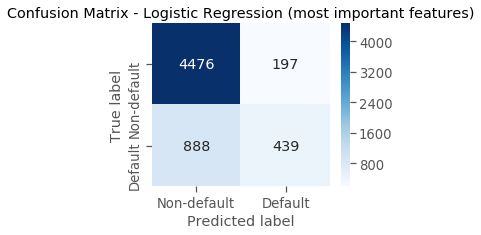

In [40]:
from sklearn.metrics import confusion_matrix
LR_imp = LogisticRegression()
LR_imp.fit(X_tr, y_tr)
y_pred = LR_imp.predict(X_t)
print('Accuracy:', metrics.accuracy_score(y_pred,y_t))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR_imp, Ximp, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_t, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_t,LR_imp.predict(X_t))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression (most important features)");

In [41]:
#build logistic regression model using standardized features
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,random_state=42)

Accuracy: 0.8151666666666667

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.67      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8177 , Standard deviation: 0.0086


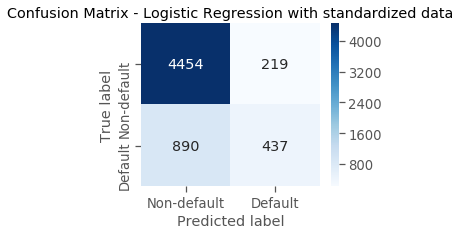

In [42]:
LRS = LogisticRegression()
LRS.fit(Xstd_train, ystd_train)
y_pred = LRS.predict(Xstd_test)
print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LRS, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(ystd_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ystd_test,LRS.predict(Xstd_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

Accuracy: 0.7255

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000


Average 5-Fold CV Score: 0.7234 , Standard deviation: 0.0106


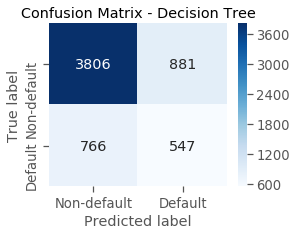

In [21]:
#decision tree
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

In [27]:
#random forest parameters

# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(stdX, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Tuned Random Forest Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 5, 'criterion': 'entropy'}


Accuracy: 0.821

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Average 5-Fold CV Score: 0.821 , Standard deviation: 0.0099


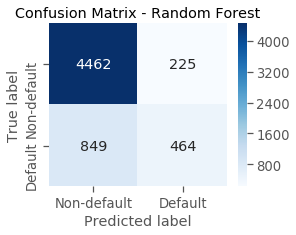

In [30]:
#random forest using the parameters outfrom from above

Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [20]:
#standradize feature
features = card.drop('Def_pay', axis=1)  
y = card['Def_pay']
stdX = (features - features.mean()) / (features.std())
X_train, X_test, y_train, y_test = train_test_split(stdX, y, test_size=0.2, random_state=42)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 20}

0.8145833333333333

Text(26.499999999999993, 0.5, 'True label')

Text(0.5, 8.5, 'Predicted label')

Text(0.5, 1, 'Confusion Matrix - KNN')

[[4453  234]
 [ 891  422]]
Test set predictions: [0 0 0 ... 0 0 0]
Test set accuracy: 0.81


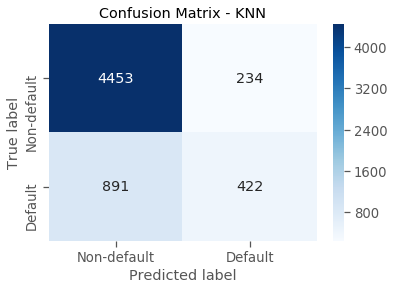

In [22]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
#check top performing n_neighbors value
knn_gscv.best_params_
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_
y_pred = knn_gscv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN")
print(cm)
print("Test set predictions:", knn_gscv.predict(X_test))
print("Test set accuracy: {:.2f}".format(knn_gscv.score(X_test, y_test)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Accuracy on Test Set for kernel-SVM = 0.82
Mean kernel-SVM CrossVal Accuracy on Train Set 0.82, with std=0.00


Text(26.499999999999993, 0.5, 'True label')

Text(0.5, 8.5, 'Predicted label')

Text(0.5, 1, 'Confusion Matrix - SVM')

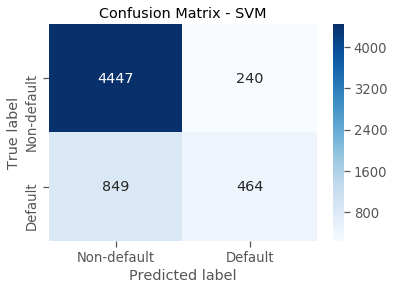

In [35]:
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf",probability=True)
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )
probas_ = classifier1.fit(X_train, y_train).predict_proba(X_test)

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=5)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM")

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

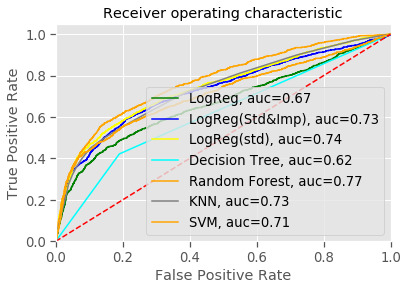

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
auc1 = metrics.roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])

y_pred_proba_LRimp = LR_imp.predict_proba(X_t)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_t,  y_pred_proba_LRimp)
auc5 = metrics.roc_auc_score(y_t, y_pred_proba_LRimp)

y_pred_proba_LRS = LRS.predict_proba(Xstd_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(ystd_test,  y_pred_proba_LRS)
auc4 = metrics.roc_auc_score(ystd_test, y_pred_proba_LRS)

y_pred_proba_DT = Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_RF)


y_scores = knn_gscv.predict_proba(X_test)[:, 1]
fpr6, tpr6, threshold = metrics.roc_curve(y_test, y_scores)
auc6 = metrics.roc_auc_score(y_test, y_scores)

fpr7, tpr7, thresholds = roc_curve(y_test, probas_[:, 1])
auc7 = metrics.auc(fpr7, tpr7)


plt.figure()
plt.plot(fpr, tpr, label="LogReg, auc="+str(round(auc1,2)),color='green')
plt.plot(fpr5,tpr5,label="LogReg(Std&Imp), auc="+str(round(auc5,2)),color='blue')
plt.plot(fpr4,tpr4,label="LogReg(std), auc="+str(round(auc4,2)),color='yellow')
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)),color='Aqua')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc3,2)),color='Orange')
plt.plot(fpr6,tpr6,label="KNN, auc="+str(round(auc6,2)),color='grey')
plt.plot(fpr7,tpr7,label="SVM, auc="+str(round(auc7,2)),color='Orange')    
                             
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()